In [4]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt  # Библиотека за визуелизација
import seaborn as sns
import numpy as np  # Библиотека за нумерички анализи
import pandas as pd
from scipy import stats  # Библиотека за статистички анализи
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge  # Вчитување на модели за линерна регресија
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # За евалуација на модели
from sklearn.feature_selection import SelectKBest, f_regression

## Линеарна регресија

In [6]:
data = pd.read_csv("co2.csv")

In [7]:
data.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [8]:
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [9]:
encoder = LabelEncoder()

In [10]:
data['Make'] = encoder.fit_transform(data['Make'])

In [11]:
data['Model'] = encoder.fit_transform(data['Model'])

In [12]:
data['Vehicle Class'] = encoder.fit_transform(data['Vehicle Class'])

In [13]:
data['Fuel Type'] = encoder.fit_transform(data['Fuel Type'])

In [14]:
data['Transmission'] = encoder.fit_transform(data['Transmission'])

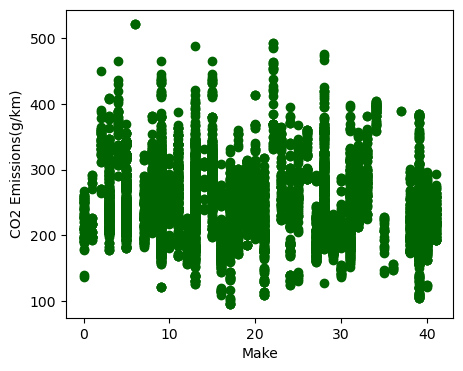

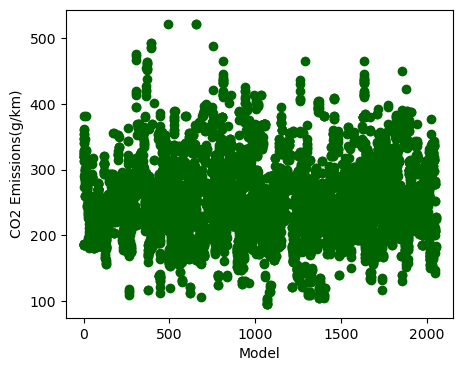

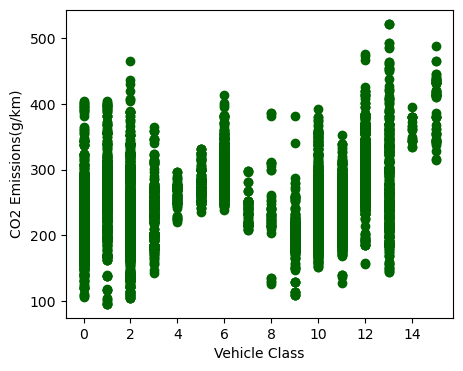

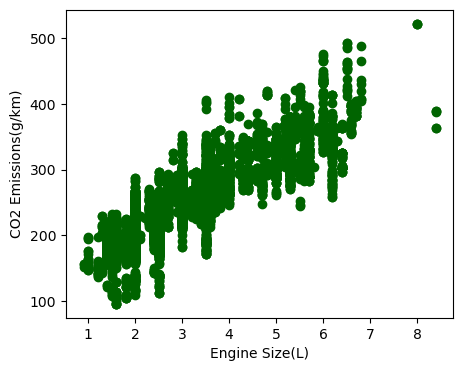

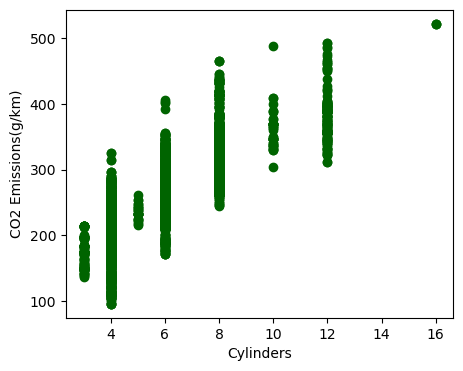

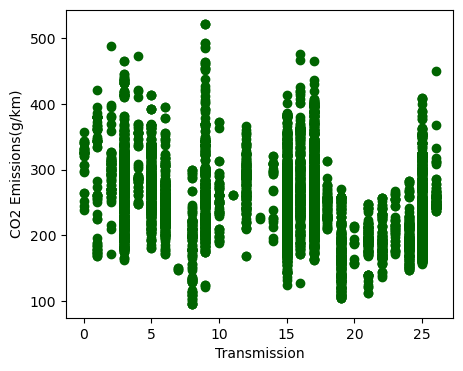

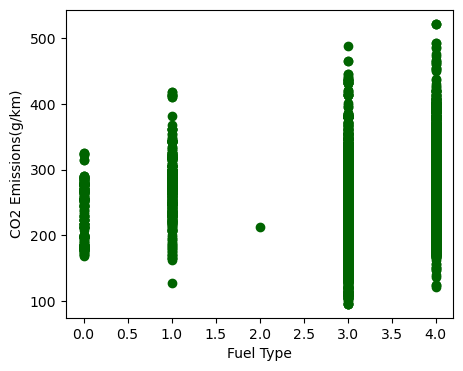

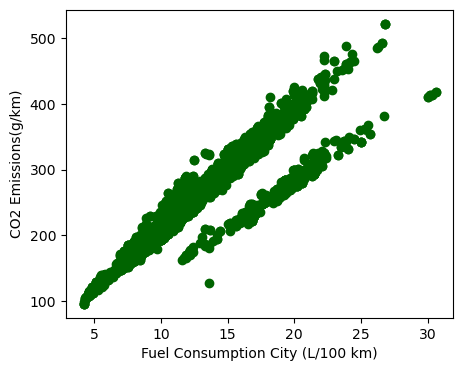

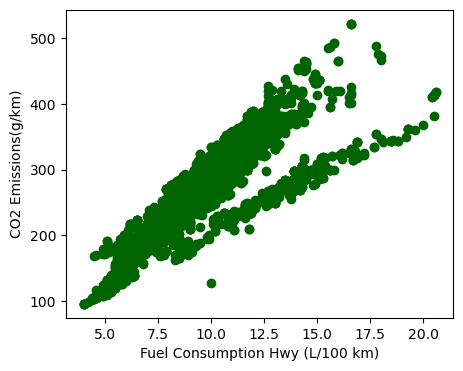

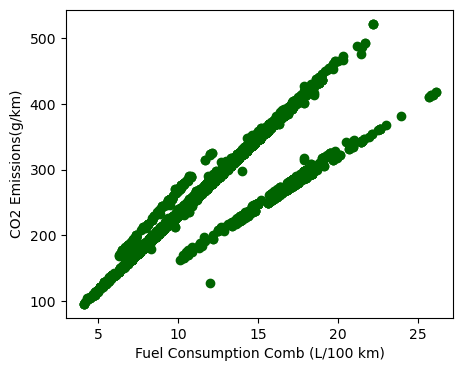

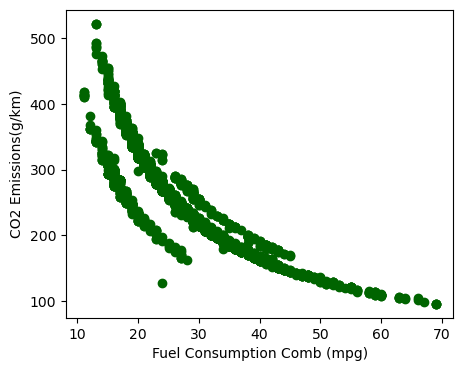

In [15]:
target = "CO2 Emissions(g/km)"
for col in data.columns:
    if target != col:
        plt.figure(figsize=(5, 4))
        plt.scatter(data[col], data[target], color = 'darkgreen')
        plt.xlabel(col)
        plt.ylabel(target)
        plt.show()

In [16]:
X = data.drop(axis=1, columns=['CO2 Emissions(g/km)'])

In [17]:
y = data['CO2 Emissions(g/km)']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [65]:
y_pred = reg.predict(X_test)

In [67]:
mean_squared_error(y_test, y_pred)

295.3046695124163

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Count'>

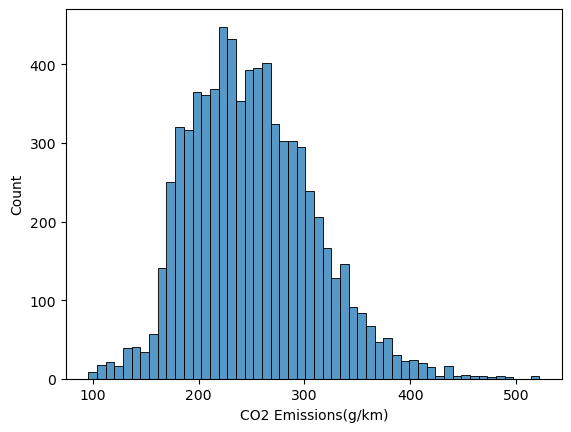

In [69]:
sns.histplot(y)

In [20]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [73]:
reg = LinearRegression().fit(X_train, y_train)
print("Коефициенти W: ", reg.coef_)
print("Пресек W0: ", reg.intercept_)

y_pred = reg.predict(X_test)
print("Средна квадратна грешка:", mean_squared_error(y_test, y_pred))
print("Средна апсолутна грешка:", mean_absolute_error(y_test, y_pred))
print("Корен на средна квадратна грешка:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-квадрат: ", r2_score(y_test,y_pred))

Коефициенти W:  [   2.41525564    1.507816      9.20116293   39.01193688   72.63199337
   -1.56336049   29.36379654   17.51258167   38.25296058  116.3565872
 -149.03547403]
Пресек W0:  184.13252948805257
Средна квадратна грешка: 293.3901108415633
Средна апсолутна грешка: 11.058165439448286
Корен на средна квадратна грешка: 17.12863423748558
R-квадрат:  0.9131392279215774


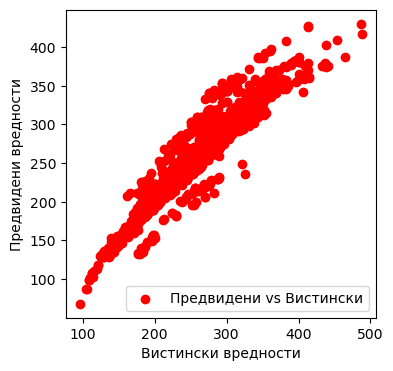

In [77]:
plt.figure(figsize=(4, 4))
plt.scatter(y_test, y_pred, c='red', label='Предвидени vs Вистински')
plt.xlabel("Вистински вредности")
plt.ylabel("Предвидени вредности")
plt.legend()
plt.show()

In [89]:
X[0]

array([0.        , 0.51510721, 0.        , 0.14666667, 0.07692308,
       0.53846154, 1.        , 0.21590909, 0.1626506 , 0.2       ,
       0.37931034])

## Повеќекратна линеарна регресија

In [110]:
number_of_features= X.shape[1]
number_of_targets = 1
feature_names = data.columns
target_names = set(list(data['CO2 Emissions(g/km)']))

In [112]:
feature_names

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

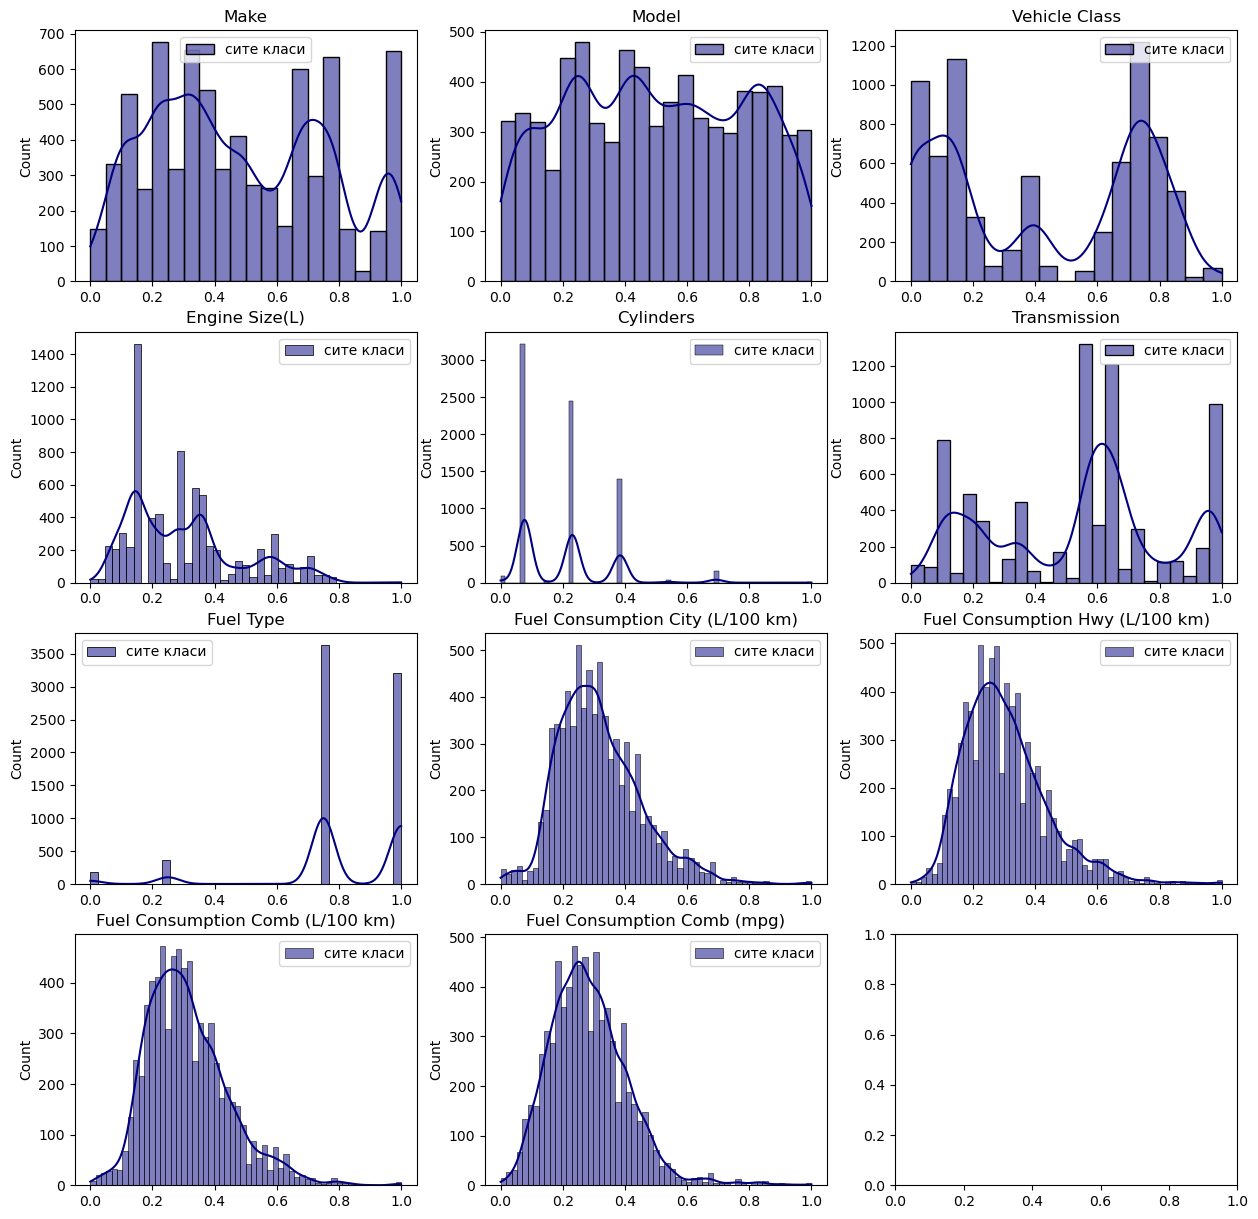

In [126]:
fig = plt.figure(figsize=(15, 15))
fig.subplots(nrows=4, ncols=3)
for feat_i in range(number_of_features): #хистограми за секој атрибут
    ax = plt.subplot(4,3, feat_i+1)
    plt.title(feature_names[feat_i])
    sns.histplot(X[:,feat_i],color='navy',label='сите класи',kde=True,stat="count") # се прикажува хистограм на вредностите на соодветниот атрибут без разлика во која класа припаѓаат
    plt.legend()
plt.show()

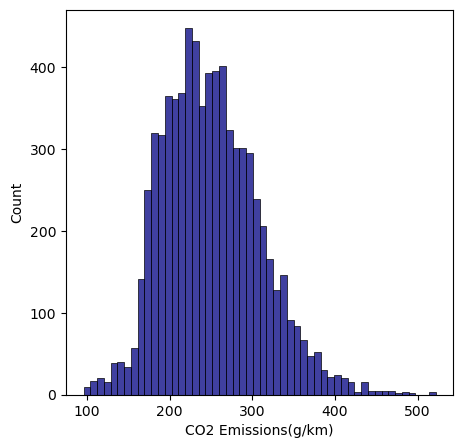

In [132]:
fig = plt.figure(figsize=(5, 5))
sns.histplot(y, color = "navy")
plt.show()

### Зависност меѓу атрибутите

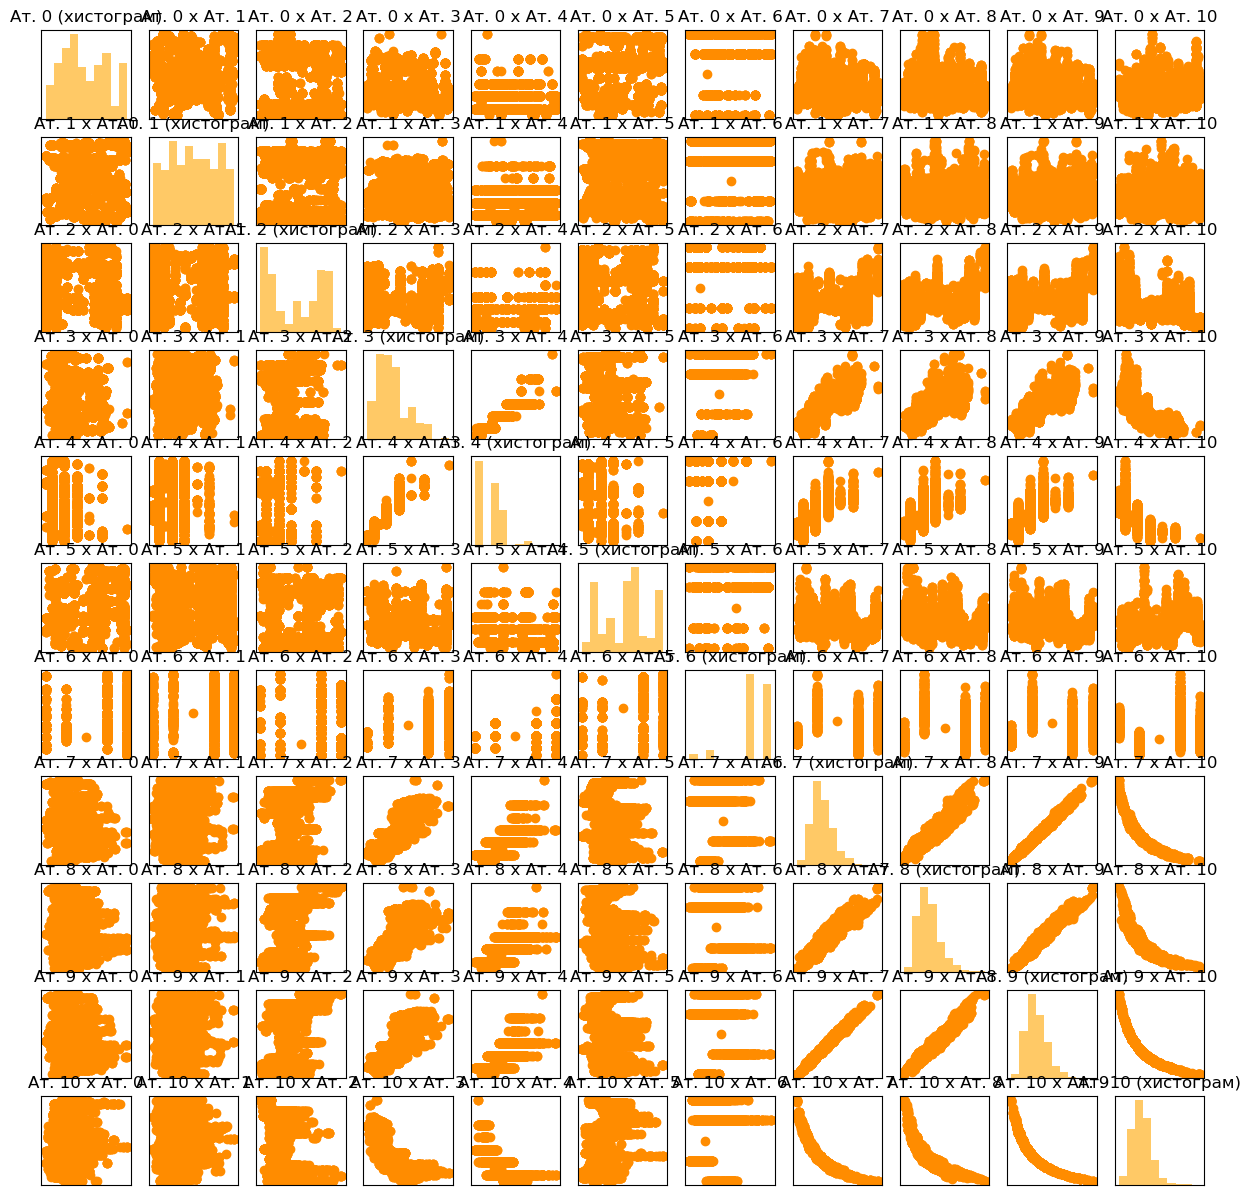

In [134]:
fig = plt.figure(figsize=(15, 15))
fig.subplots(nrows=number_of_features, ncols=number_of_features)
for feature_i in range(number_of_features):
    for feature_j in range(number_of_features):
        ax = plt.subplot(number_of_features,number_of_features,number_of_features*feature_i + feature_j+1)
        if feature_i==feature_j:
          plt.hist(X[:, feature_i], alpha=.6, color="orange")
          plt.title("Ат. "+str(feature_i)+" (хистограм)")
        else:
          plt.scatter(X[:,feature_i], X[:,feature_j], color="darkorange")
          plt.title("Ат. "+str(feature_i)+" x Ат. "+str(feature_j)) 
        plt.xticks(())
        plt.yticks(())
plt.show()

### Зависност меѓу излезната променлива и атрибутите

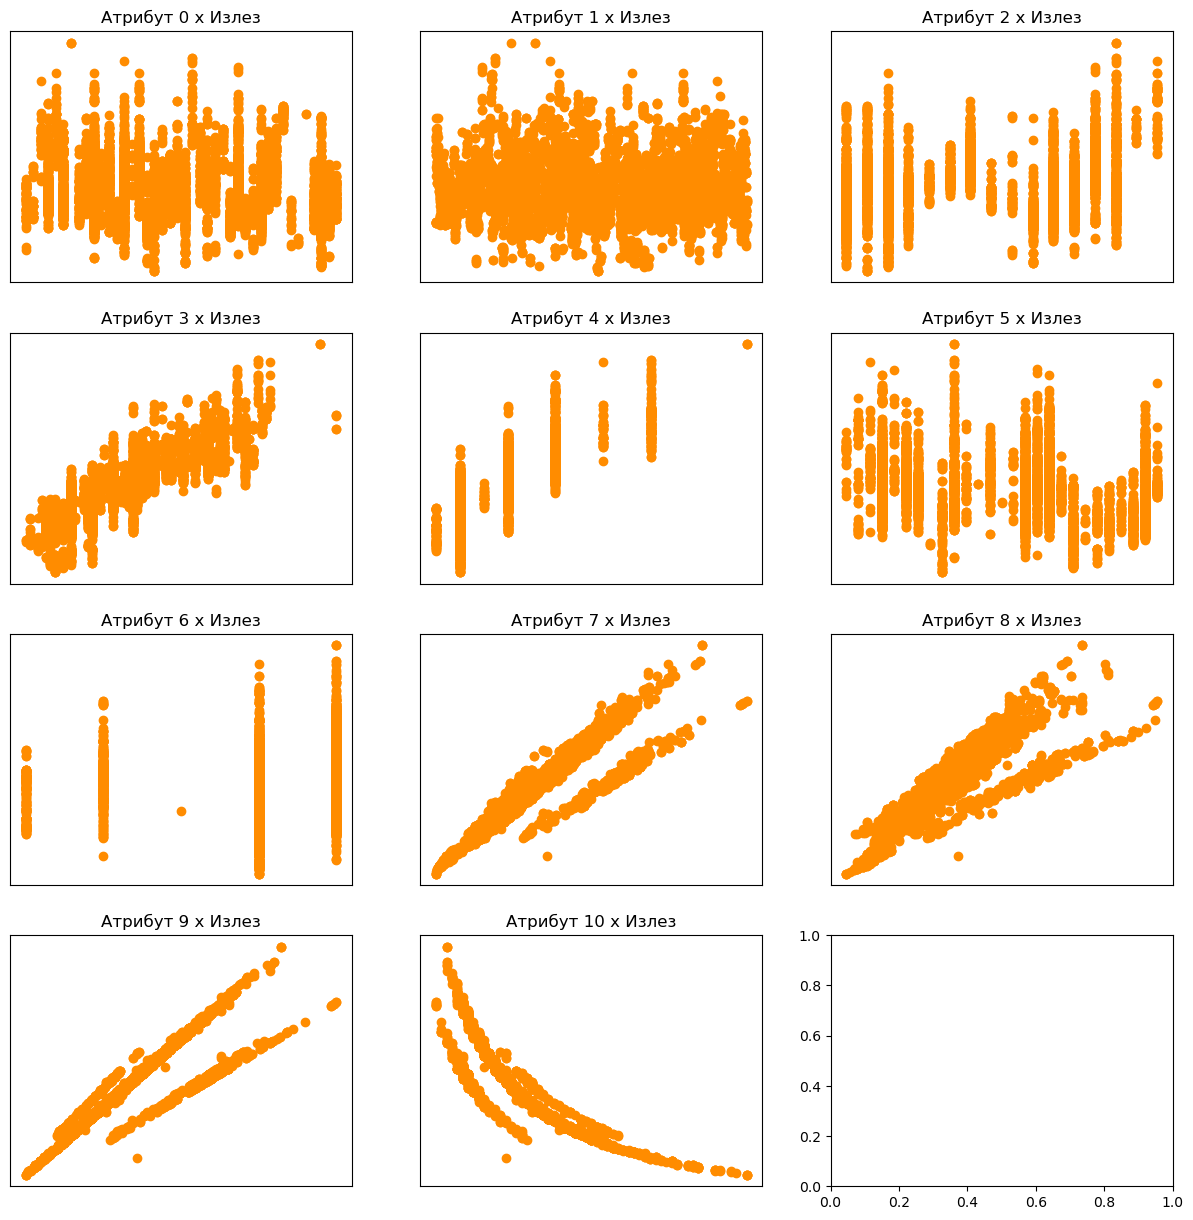

In [145]:
fig = plt.figure(figsize=(15, 15))
fig.subplots(nrows=4,ncols=3)
for feat_i in range(number_of_features):
    ax = plt.subplot(4,3, feat_i+1)
    plt.scatter( X[:,feat_i], y, color="darkorange")
    plt.xticks(())
    plt.yticks(())
    plt.title("Атрибут "+ str(feat_i)+" x Излез")
plt.show()

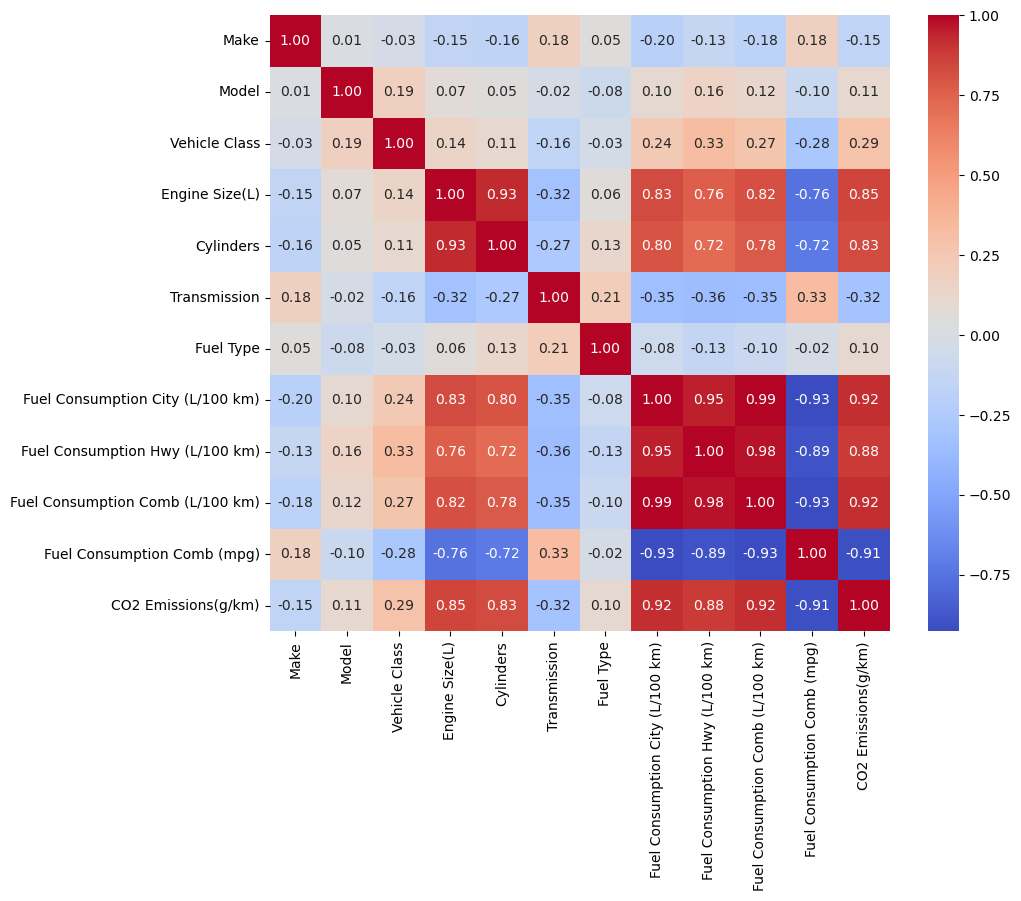

In [149]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.show()

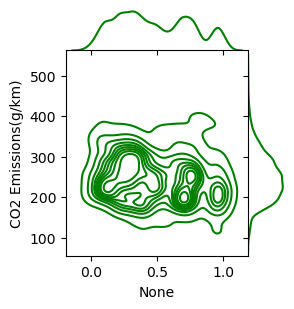

In [151]:
sns.jointplot(x=X[:,0], y=y, kind="kde", space=0, color="g", height = 3)
plt.show()

### Риџ регресија


Alpha:  0.1
Коефициенти W:  [   2.40461783    1.50975861    9.21671398   39.2898127    72.21652301
   -1.58780658   29.4166228    52.61250909   55.93619898   64.30191529
 -148.12637753]
Пресек W0:  183.62778796596845
Средна квадратна грешка: 293.5220245686368
Средна апсолутна грешка: 11.064029374931815
Корен на средна квадратна грешка: 17.13248448324518
R-квадрат:  0.913100173680286


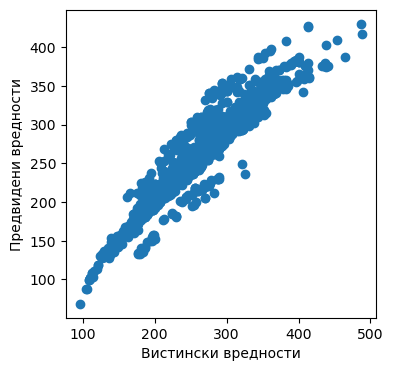

Alpha:  0.5
Коефициенти W:  [   2.36018561    1.50578621    9.28410562   40.31475339   70.70529173
   -1.65250578   29.65396298   58.09994687   57.47989488   60.32325099
 -144.38032689]
Пресек W0:  181.4325113575762
Средна квадратна грешка: 293.78796539151546
Средна апсолутна грешка: 11.076874800010252
Корен на средна квадратна грешка: 17.140244029520566
R-квадрат:  0.913021439515947


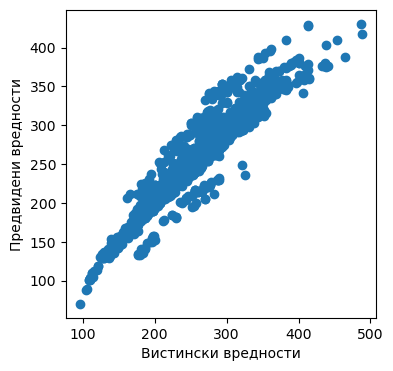

Alpha:  0.8
Коефициенти W:  [   2.32410822    1.50135886    9.32949012   41.02994789   69.7005529
   -1.69735211   29.81089493   59.70901895   57.62917676   60.58452545
 -141.82287746]
Пресек W0:  179.95290479092063
Средна квадратна грешка: 293.99295992574014
Средна апсолутна грешка: 11.086939937939539
Корен на средна квадратна грешка: 17.146222905518876
R-квадрат:  0.9129607490466481


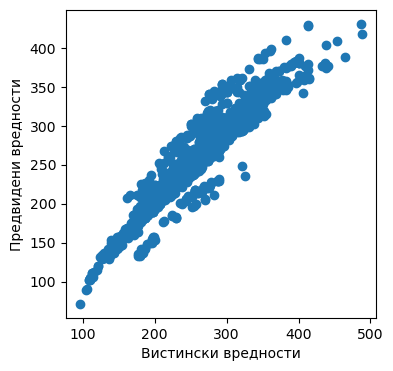

In [47]:
alphas = [0.1, 0.5, 0.8]

for alpha in alphas:
    reg = Ridge(alpha=alpha).fit(X_train, y_train)
    print("Alpha: ", alpha)
    print("Коефициенти W: ", reg.coef_)
    print("Пресек W0: ", reg.intercept_)
    
    y_pred = reg.predict(X_test) 
    print("Средна квадратна грешка:", mean_squared_error(y_test, y_pred))
    print("Средна апсолутна грешка:", mean_absolute_error(y_test, y_pred))
    print("Корен на средна квадратна грешка:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R-квадрат: ", r2_score(y_test,y_pred))
    
    plt.figure(figsize=(4, 4))
    plt.scatter(y_test,y_pred)
    plt.xlabel("Вистински вредности")
    plt.ylabel("Предвидени вредности")
    plt.show()

### Ласо регресија

Alpha:  0.1
Коефициенти W:  [   0.33430016    0.3381232     9.05808306   46.96408287   64.61462284
   -0.30707158   27.08194928   72.97748901   69.49815073   24.97302526
 -145.52809358]
Пресек W0:  186.6947672756744
Средна квадратна грешка: 294.2196993223836
Средна апсолутна грешка: 11.17372057986102
Корен на средна квадратна грешка: 17.152833565402062
R-квадрат:  0.9128936208159231


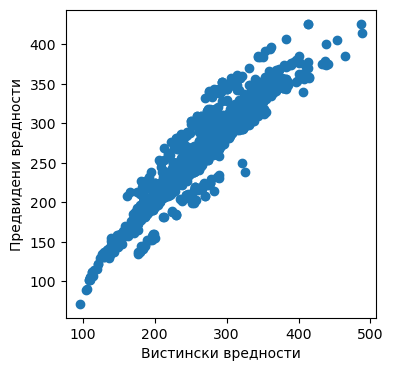

Alpha:  0.5
Коефициенти W:  [  -0.            0.            8.16186132   74.34067668   35.01261921
   -0.           18.61855464   79.61025194   55.7976933    15.28994413
 -130.8687135 ]
Пресек W0:  192.82248130207688
Средна квадратна грешка: 316.2660211286109
Средна апсолутна грешка: 12.233016016197992
Корен на средна квадратна грешка: 17.783869689373315
R-квадрат:  0.9063666096358756


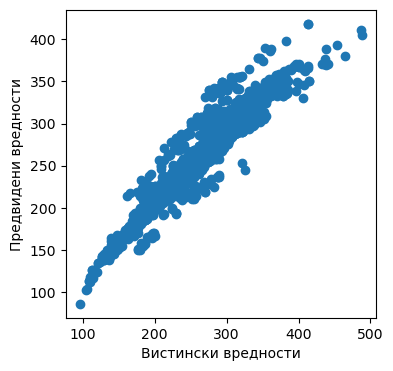

Alpha:  0.8
Коефициенти W:  [  -0.            0.            7.46012702   94.7063726    12.86955802
   -0.           12.32041793   90.55830455   47.50839343    0.13939509
 -119.81454369]
Пресек W0:  197.26197545562653
Средна квадратна грешка: 354.5918733330487
Средна апсолутна грешка: 13.420748359300335
Корен на средна квадратна грешка: 18.830610009584095
R-квадрат:  0.8950198975620023


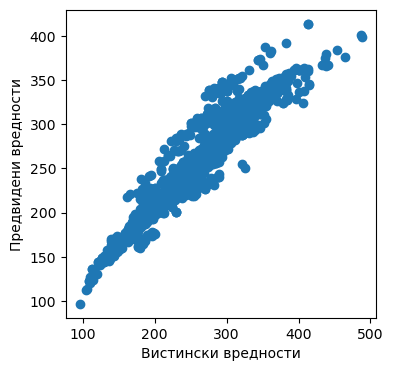

In [49]:
alphas = [0.1, 0.5, 0.8]

for alpha in alphas:
    reg = Lasso(alpha = alpha).fit(X_train, y_train)
    print("Alpha: ", alpha)

    print("Коефициенти W: ", reg.coef_)
    print("Пресек W0: ", reg.intercept_)
    
    y_pred = reg.predict(X_test) 
    print("Средна квадратна грешка:", mean_squared_error(y_test, y_pred))
    print("Средна апсолутна грешка:", mean_absolute_error(y_test, y_pred))
    print("Корен на средна квадратна грешка:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R-квадрат: ", r2_score(y_test,y_pred)) 
    
    plt.figure(figsize=(4, 4))
    plt.scatter(y_test,y_pred)
    plt.xlabel("Вистински вредности")
    plt.ylabel("Предвидени вредности")
    plt.show()

### Регресија на еластична мрежа

Коефициенти W:  [ -4.92339857   3.66680811  15.07218798  47.43233244  37.2958169
 -12.83733875  13.54043812  39.2276067   37.26622645  38.55551326
 -37.58891205]
Пресек W0:  193.92405425690635
Средна квадратна грешка: 776.8148410467651
Средна апсолутна грешка: 21.70611524180968
Корен на средна квадратна грешка: 27.871398261421422
R-квадрат:  0.7700170034301638


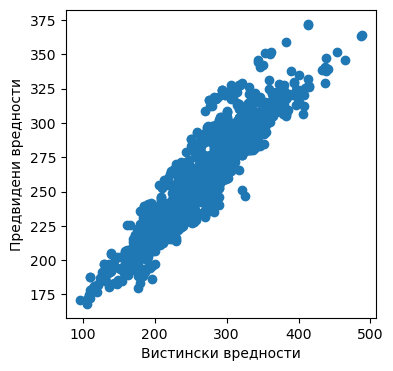

In [166]:
reg = ElasticNet(alpha = 0.1, l1_ratio = 0.3).fit(X_train, y_train)
print("Коефициенти W: ", reg.coef_)
print("Пресек W0: ", reg.intercept_)

y_pred = reg.predict(X_test)
print("Средна квадратна грешка:", mean_squared_error(y_test, y_pred))
print("Средна апсолутна грешка:", mean_absolute_error(y_test, y_pred))
print("Корен на средна квадратна грешка:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-квадрат: ", r2_score(y_test,y_pred)) 

plt.figure(figsize=(4, 4))
plt.scatter(y_test,y_pred)
plt.xlabel("Вистински вредности")
plt.ylabel("Предвидени вредности")
plt.show()

### Баесова Риџ регресија

Коефициенти W:  [   2.40744613    1.50983573    9.21183452   39.21631255   72.32806239
   -1.58291277   29.39947295   51.04079985   55.23391453   66.3534962
 -148.39526486]
Пресек W0:  183.78557330205024
Средна квадратна грешка: 293.501900848862
Средна апсолутна грешка: 11.063109689610267
[17.28762727 17.33316059 17.33384974 ... 17.32323672 17.2680706
 17.35324562]
2216
Корен на средна квадратна грешка: 17.1318971759949
R-квадрат:  0.9131061314879015


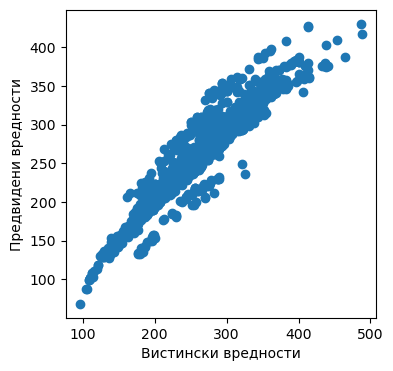

In [169]:
reg = BayesianRidge().fit(X_train, y_train)
print("Коефициенти W: ", reg.coef_)
print("Пресек W0: ", reg.intercept_)

y_pred, y_std = reg.predict(X_test, return_std = True)
print("Средна квадратна грешка:", mean_squared_error(y_test, y_pred))
print("Средна апсолутна грешка:", mean_absolute_error(y_test, y_pred))
print(y_std)
print(len(y_std))
print("Корен на средна квадратна грешка:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-квадрат: ", r2_score(y_test, y_pred)) 

plt.figure(figsize=(4, 4))
plt.scatter(y_test,y_pred)
plt.xlabel("Вистински вредности")
plt.ylabel("Предвидени вредности")
plt.show()